In [28]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import pickle
import matplotlib.pyplot as plt

In [14]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# MODEL HYPERPARAMETERS
N_EMBD = 700
N_HEADS = 7
MAX_LENGTH = 300
N_LAYERS = 6
DROPOUT = 0.2

In [94]:
with open("../data/processed_train.pickle", "rb") as file:
    sentences, segments, targets = pickle.load(file)

(array([6.220e+02, 1.565e+03, 1.951e+03, 1.941e+03, 1.726e+03, 1.438e+03,
        1.175e+03, 7.300e+02, 4.120e+02, 2.530e+02, 1.470e+02, 7.200e+01,
        4.600e+01, 1.800e+01, 1.300e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00]),
 array([ 11.  ,  24.15,  37.3 ,  50.45,  63.6 ,  76.75,  89.9 , 103.05,
        116.2 , 129.35, 142.5 , 155.65, 168.8 , 181.95, 195.1 , 208.25,
        221.4 , 234.55, 247.7 , 260.85, 274.  ]),
 <BarContainer object of 20 artists>)

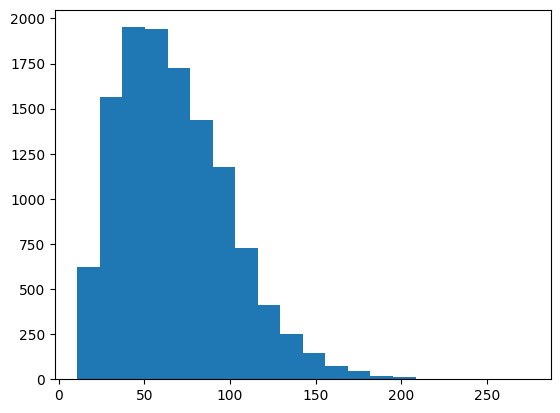

In [30]:
plt.hist([len(sentence) for sentence in sentences], 20)

In [84]:
class tokenizer:
    def __init__(self):
        self.pad_token = 5002

In [96]:

def pad(tokenizer, sentences, segments):
        sentences = torch.stack([F.pad(torch.tensor(sentence, dtype=torch.long), (0,MAX_LENGTH-len(sentence)),
                              value=tokenizer.pad_token) for sentence in sentences])
        segments = torch.stack([F.pad(torch.tensor(segment, dtype=torch.long), (0,MAX_LENGTH-len(segment)),
                              value=0) for segment in segments])
        sentences, segments = sentences.to(DEVICE), segments.to(DEVICE)
        return (sentences, segments)  

In [97]:
sentences, segments = pad(tokenizer(), sentences, segments)
targets = torch.tensor(targets, device=DEVICE, dtype=torch.long)

In [87]:
sentences.shape

torch.Size([12120, 300])

In [198]:
n_masks = int(MAX_LENGTH * 0.2)

In [199]:
ix = torch.randint(MAX_LENGTH - 1, (sentences.shape[0], n_masks))
ix.shape

torch.Size([12120, 60])

In [200]:
mask = torch.zeros_like(sentences)

In [201]:
for i in range(12120):
    mask[i, ix[i]] = 1

In [209]:
mask[1,3:44]

tensor([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], device='cuda:0')

In [207]:
sentences[1, 3:44]

tensor([4368,  459, 4219,  382,  448,  272, 1581,  339,  495,  316, 2883,  740,
        3059,  115,  315, 2134, 4287,  115,   44, 1145, 1323,   46,   32, 5001,
          80,  114,  780,  740, 3059,  115,  459,  485,  286,  731, 4447,  311,
        1011,  396, 1596, 4219,   46], device='cuda:0')

In [204]:
mask = ((mask & (sentences != 5002)) & (sentences != 5000)) & (sentences != 5001)

In [205]:
sentences != 5000

tensor([[False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        ...,
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True],
        [False, False, False,  ...,  True,  True,  True]], device='cuda:0')

In [206]:
mask[0]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,